<a href="https://colab.research.google.com/github/henrykohl/Machine-Learning-demo-repo/blob/master/JamesLearningNote/3-3-LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3.3 線性分類-邏輯斯回歸(Logistic Regression) 介紹
[來源](https://medium.com/jameslearningnote/a1a5f47017e5)

# 載入Iris資料集

In [ ]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
%matplotlib inline

In [ ]:
iris = datasets.load_iris()
x = pd.DataFrame(iris['data'], columns=iris['feature_names'])
print("target_names: "+str(iris['target_names']))
y = pd.DataFrame(iris['target'], columns=['target'])
iris_data = pd.concat([x,y], axis=1)
iris_data = iris_data[['sepal length (cm)','petal length (cm)','target']]
iris_data = iris_data[iris_data['target'].isin([0,1])]
iris_data.head(10)

target_names: ['setosa' 'versicolor' 'virginica']


,sepal length (cm),petal length (cm),target
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0
5,5.4,1.7,0
6,4.6,1.4,0
7,5.0,1.5,0
8,4.4,1.4,0
9,4.9,1.5,0


# 使用sklearn中的model_selection函式將把資料分為兩群tarin、test，將來可使用test資料來檢驗我們的分類模型效果



In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    iris_data[['sepal length (cm)','petal length (cm)']], iris_data[['target']], test_size=0.3, random_state=0)

In [ ]:
X_train

,sepal length (cm),petal length (cm)
60,5.0,3.5
80,5.5,3.8
90,5.5,4.4
68,6.2,4.5
51,6.4,4.5
...,...,...
96,5.7,4.2
67,5.8,4.1
64,5.6,3.6
47,4.6,1.4


In [ ]:
len(X_train)

70

In [ ]:
X_test

,sepal length (cm),petal length (cm)
26,5.0,1.6
86,6.7,4.7
2,4.7,1.3
55,5.7,4.5
75,6.6,4.4
93,5.0,3.3
16,5.4,1.3
73,6.1,4.7
54,6.5,4.6
95,5.7,4.2


In [ ]:
len(X_test)

30

# 使用Logistic Regression之前需要先對資料做特徵縮放

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [ ]:
X_train_std.shape

(70, 2)

In [ ]:
from IPython.display import Math

In [ ]:
Math(r'z=w^Tx')

<IPython.core.display.Math object>

In [ ]:
Math(r'\phi{(z)}=\frac{1}{1+e^{-z}}')

<IPython.core.display.Math object>

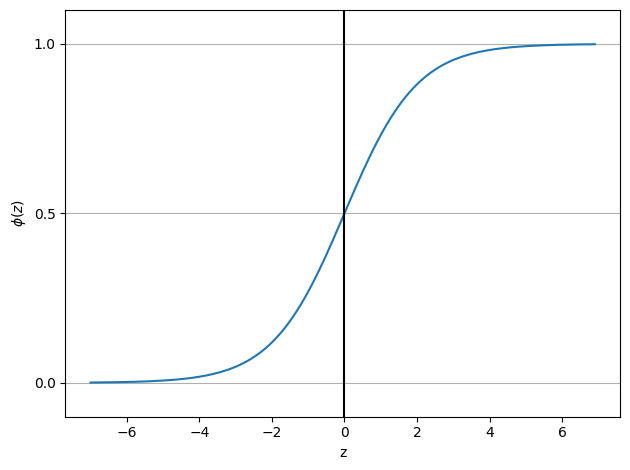

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)

plt.plot(z, phi_z)
plt.axvline(0.0, color='k') # 畫出 重直軸 x=0.0 這條線
plt.ylim(-0.1, 1.1) # y軸 -0.1 至 1.1
plt.xlabel('z')
plt.ylabel('$\phi (z)$')

# y axis ticks and gridline
plt.yticks([0.0, 0.5, 1.0]) # y 軸刻度

ax = plt.gca()    # 得到當前的 axes
ax.yaxis.grid(True)  # 畫出格線，若要添上紅色，可以寫成 ax.yaxis.grid(True, color='r')

plt.tight_layout()  # 圖會變大一點 (考量到 X、Y軸上的值與標籤，給予適當的距離)
# plt.savefig('./figures/sigmoid.png', dpi=300)
plt.show()

In [ ]:
y_train['target'].values # 以array形式返回指定column的所有取值

array([1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0])

# 初始化Logistic Regression函式，以及將資料放進Logistic Regression開始訓練

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression()
lr.fit(X_train_std,y_train['target'].values)

LogisticRegression()

[meshgrid 用法](https://wangyeming.github.io/2018/11/12/numpy-meshgrid/)

In [ ]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02): # X是(70,2)的array, y是(70,)的array, sklearn.linear_model._logistic.LogisticRegression

  # setup marker generator and color map
  markers = ('s', 'x', 'o', '^', 'v')                    # tuple 類型
  colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')          # tuple 類型
  cmap = ListedColormap(colors[:len(np.unique(y))])               # matplotlib.colors.ListedColormap 類型

  # plot the decision surface
  x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1        # 從X 的第一column中所有值取出最大的與最小的
  x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1        # 從X 的第二column中所有值取出最大的與最小的
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),      # 輸出: 類型 numpy.ndarray 大小 (236, 315), numpy.ndarray 大小 (236, 315)
                np.arange(x2_min, x2_max, resolution))

  Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)      # .ravel將2維變成1維; [[a,,...],[b,,...]]變成[[a,b],[,][,]]

  Z = Z.reshape(xx1.shape)                           # (74340,) 轉回成 (236, 315)
  plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
  plt.xlim(xx1.min(), xx1.max())                         # x 軸 範圍
  plt.ylim(xx2.min(), xx2.max())                         # y 軸 範圍

  """以上訂出背景圖樣(等高圖)"""

  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl, 0],                       # y==cl回傳一維[...,True,..,False,..]的array，以True的位置當X的row回傳第1個column值
          y=X[y == cl, 1],                       # y==cl回傳一維[...,True,..,False,..]的array，以True的位置當X的row回傳第2個column值
          alpha=0.6,
          c=cmap(idx),                           # 數據點的顏色
          edgecolor='black',                        # 數據點的外框色
          marker=markers[idx],                       # 數據點的外型
          label=cl)                             # 顯示數據類型的標標籤

  # highlight test samples
  if test_idx:
      # plot all samples
      if not versiontuple(np.__version__) >= versiontuple('1.9.0'):
          X_test, y_test = X[list(test_idx), :], y[list(test_idx)]
          warnings.warn('Please update to NumPy 1.9.0 or newer')
      else:
          X_test, y_test = X[test_idx, :], y[test_idx]

      plt.scatter(X_test[:, 0],
            X_test[:, 1],
            c='',
            alpha=1.0,
            edgecolor='black',
            linewidths=1,
            marker='o',
            s=55, label='test set')

In [ ]:
# y_train['target'].values == 1 測試示範用

# 視覺化訓練後的結果，可以明顯看出最後產出一條線將資料分為兩類

<ipython-input-19-ecaf94ef76a9>:26: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0],                       # y==cl回傳一維[...,True,..,False,..]的array，以True的位置當X的row回傳第1個column值
<ipython-input-19-ecaf94ef76a9>:26: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],                       # y==cl回傳一維[...,True,..,False,..]的array，以True的位置當X的row回傳第1個column值


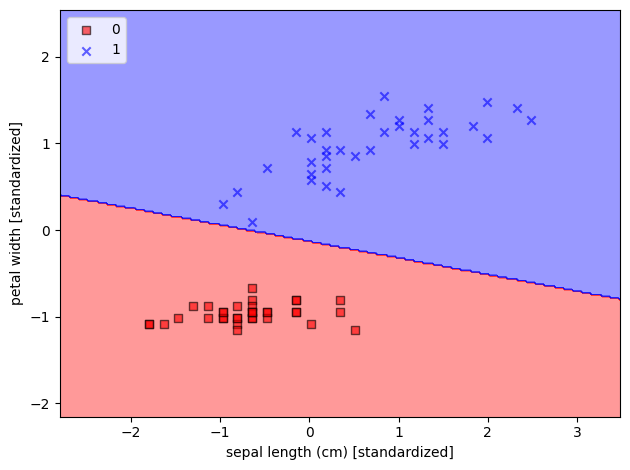

In [ ]:
plot_decision_regions(X_train_std, y_train['target'].values, classifier=lr)
plt.xlabel('sepal length (cm) [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')                            # 數據類型標籤的位置
plt.tight_layout()
plt.show()

# 預測test的資料看正確率多少？ 發現正確率100%!完美分類

In [ ]:
lr.predict(X_test_std)

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1])

In [ ]:
y_test['target'].values

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1])

In [ ]:
error = 0
for i, v in enumerate(lr.predict(X_test_std)):
    if v!= y_test['target'].values[i]:
        error+=1
print(error)

0


# 使用Predict_prob函式，可知道預測的機率為多少

In [ ]:
lr.predict_proba(X_test_std) # 每一個數據點，預測為0或是預測為1的信心百分比

array([[0.93606171, 0.06393829],
       [0.00497007, 0.99502993],
       [0.97297313, 0.02702687],
       [0.01892083, 0.98107917],
       [0.01007719, 0.98992281],
       [0.30602173, 0.69397827],
       [0.94913163, 0.05086837],
       [0.0086973 , 0.9913027 ],
       [0.00735109, 0.99264891],
       [0.03454645, 0.96545355],
       [0.06120019, 0.93879981],
       [0.04688146, 0.95311854],
       [0.01434288, 0.98565712],
       [0.9875209 , 0.0124791 ],
       [0.94733967, 0.05266033],
       [0.94642148, 0.05357852],
       [0.98655365, 0.01344635],
       [0.90494712, 0.09505288],
       [0.93254052, 0.06745948],
       [0.97489243, 0.02510757],
       [0.93606171, 0.06393829],
       [0.03916972, 0.96083028],
       [0.96322075, 0.03677925],
       [0.03578511, 0.96421489],
       [0.96386204, 0.03613796],
       [0.93138299, 0.06861701],
       [0.96986241, 0.03013759],
       [0.04211754, 0.95788246],
       [0.05699625, 0.94300375],
       [0.00368696, 0.99631304]])